# **Group Assignment** - Bike Sharing

- `instant`: record index
- `dteday` : date
- `season` : season 1:winter, 2:spring, 3:summer, 4:fall
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : wether day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Load the data
data = pd.read_csv('bike-sharing-hourly.csv')
original = data.copy()

In [18]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


## PART I: Exploratory Data Analysis

- Data Analysis (descriptive analytics) (3 points)
- Ensuring data quality (correctness, consistency, missing values, outliers...).
- Plotting clear and meaningful figures.
- Giving insights on what seems relevant for prediction and what does not.
- Discussion on missing values and outliers
- Treatment of text and date features
- Generation of extra features (e.g., season, yes/no holiday, hours of daylight, combinations of features, quantization/binarization, polynomial features)
- Provide useful explanations about the decisions taken and the results obtained
- NOTES:
-- There's no limit to the number of figures or insights to extract, but the quality will count more than the quantity. 


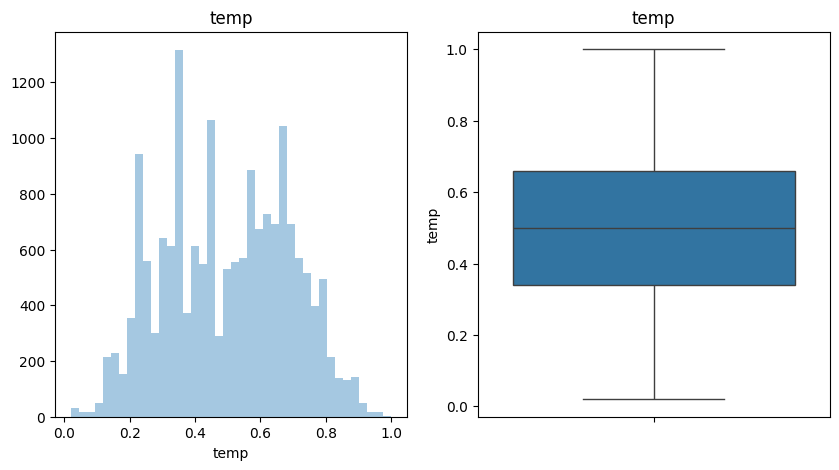

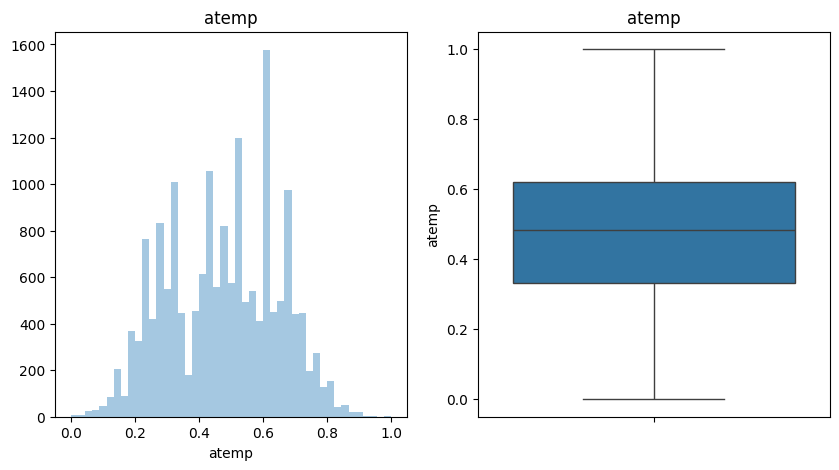

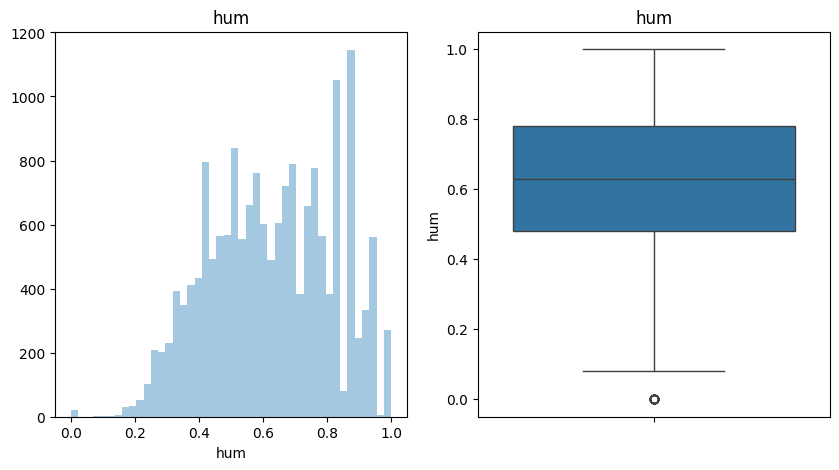

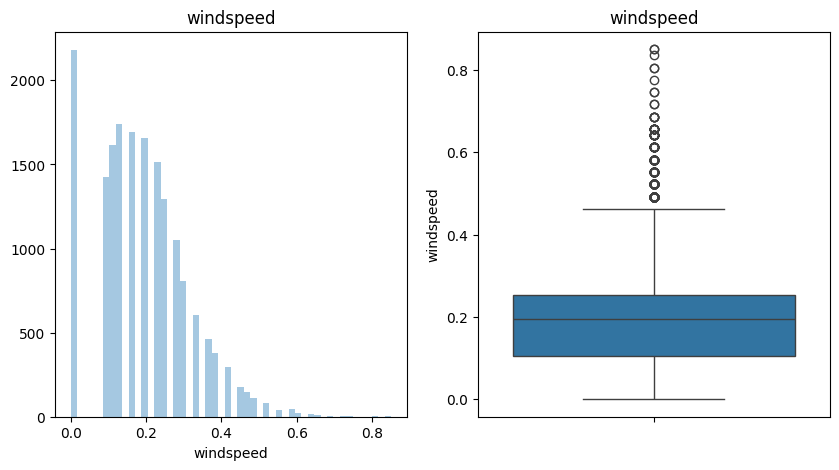

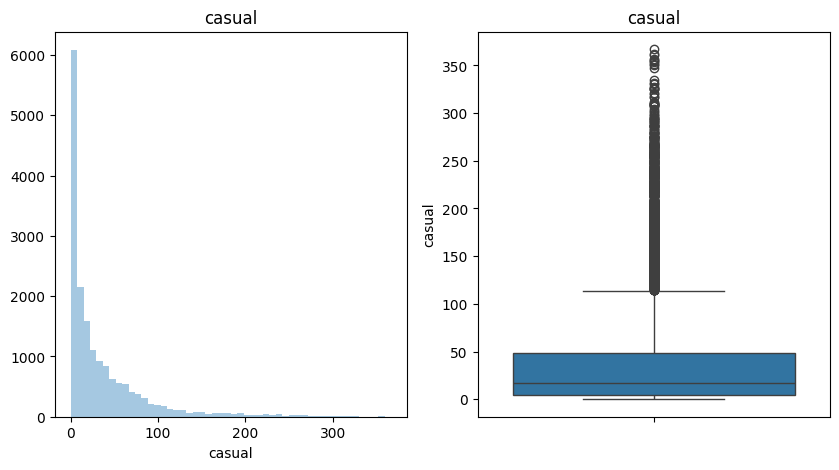

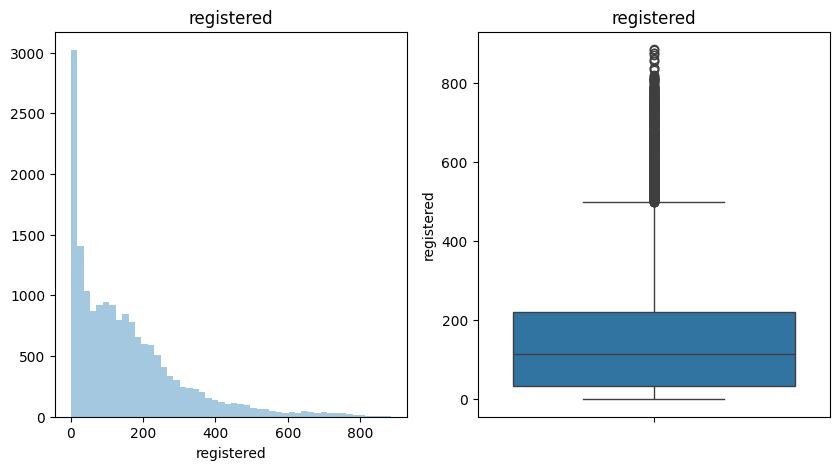

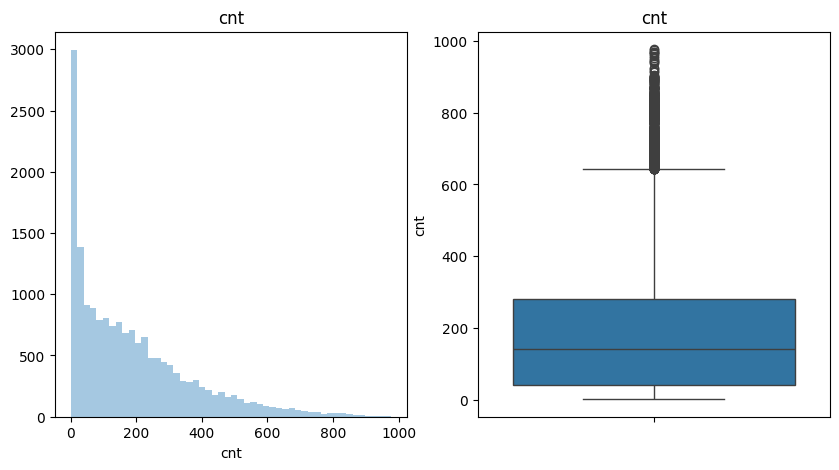

In [21]:
cat = ['season',  'weathersit']

num = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

days = ['workingday','weekday', 'holiday']

time = ['dteday', 'hr', 'month', 'yr']

# Create a new dataframe with continuous variables
data_num = data[num]

for i in data_num.columns:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.distplot(data_num[i], kde=False)
    plt.title(i)
    plt.subplot(1,2,2)
    sns.boxplot(data_num[i])
    plt.title(i)
    plt.show()

In [22]:
# Group the data by year and by season and plot the average number of bikes rented for each season for each year, using a line bar, using plotly library
import plotly.express as px
data_yr_season = data.groupby(['yr', 'season'])["cnt"].mean().reset_index()
fig = px.bar(data_yr_season, x='season', y='cnt', color='yr', barmode='group')
fig.show()

In [23]:
# Group the data by weathersit and plot the average number of bikes rented for each type of weather, using a bar plot, using plotly library
data_weathersit = data.groupby(['weathersit'])["cnt"].mean().reset_index()
fig = px.bar(data_weathersit, x='weathersit', y='cnt')
fig.show()

In [24]:
import plotly.graph_objects as go

# Group the data by hour and calculate the average rental count for each hour
hourly_demand = data.groupby('hr')['cnt'].mean().reset_index()

# Create a bar plot using Plotly
fig = go.Figure(data=go.Bar(
    x=hourly_demand['hr'],
    y=hourly_demand['cnt'],
    marker_color='skyblue'
))

# Customize the layout
fig.update_layout(
    title='Average Bike Rental Count by Hour of the Day',
    xaxis=dict(title='Hour of the Day'),
    yaxis=dict(title='Average Rental Count'),
    bargap=0.1,
    plot_bgcolor='rgba(0,0,0,0)',
    showlegend=False
)

# Show the plot
fig.show()


In [25]:
import plotly.graph_objects as go

# Group the data by year and hour, and calculate the average rental count for each hour and year
hourly_demand_yearly = data.groupby(['yr', 'hr'])['cnt'].mean().reset_index()

# Filter data for year 0 and year 1
year_0_data = hourly_demand_yearly[hourly_demand_yearly['yr'] == 0]
year_1_data = hourly_demand_yearly[hourly_demand_yearly['yr'] == 1]

# Create bar plots for each year
fig = go.Figure()

# Bar plot for year 0
fig.add_trace(go.Bar(
    x=year_0_data['hr'],
    y=year_0_data['cnt'],
    name='Year 0',
    marker_color='lightskyblue'
))

# Bar plot for year 1
fig.add_trace(go.Bar(
    x=year_1_data['hr'],
    y=year_1_data['cnt'],
    name='Year 1',
    marker_color='lightgreen'
))

# Customize the layout
fig.update_layout(
    title='Average Bike Rental Count by Hour of the Day for Each Year',
    xaxis=dict(title='Hour of the Day'),
    yaxis=dict(title='Average Rental Count'),
    bargap=0.1,
    plot_bgcolor='rgba(0,0,0,0)',
    showlegend=True
)

# Show the plot
fig.show()

In [26]:
import plotly.graph_objects as go

# Group the data by year, hour, and user type, and calculate the average rental count for each hour, year, and user type
hourly_demand_yearly_user = data.groupby(['yr', 'hr'])[['registered', 'casual', 'cnt']].mean().reset_index()

# Filter data for year 0 and year 1 for registered users
year_0_registered_data = hourly_demand_yearly_user[hourly_demand_yearly_user['yr'] == 0]
year_1_registered_data = hourly_demand_yearly_user[hourly_demand_yearly_user['yr'] == 1]

# Create bar plots for each year for registered users
fig = go.Figure()

# Bar plot for year 0 registered users
fig.add_trace(go.Bar(
    x=year_0_registered_data['hr'],
    y=year_0_registered_data['registered'],
    name='Year 0 - Registered',
    marker_color='lightskyblue'
))

# Bar plot for year 1 registered users
fig.add_trace(go.Bar(
    x=year_1_registered_data['hr'],
    y=year_1_registered_data['registered'],
    name='Year 1 - Registered',
    marker_color='lightgreen'
))

# Filter data for year 0 and year 1 for casual users
year_0_casual_data = hourly_demand_yearly_user[hourly_demand_yearly_user['yr'] == 0]
year_1_casual_data = hourly_demand_yearly_user[hourly_demand_yearly_user['yr'] == 1]

# Bar plot for year 0 casual users
fig.add_trace(go.Bar(
    x=year_0_casual_data['hr'],
    y=year_0_casual_data['casual'],
    name='Year 0 - Casual',
    marker_color='dodgerblue'
))

# Bar plot for year 1 casual users
fig.add_trace(go.Bar(
    x=year_1_casual_data['hr'],
    y=year_1_casual_data['casual'],
    name='Year 1 - Casual',
    marker_color='limegreen'
))

# Customize the layout
fig.update_layout(
    title='Average Bike Rental Count by Hour of the Day for Each User Type in Each Year',
    xaxis=dict(title='Hour of the Day'),
    yaxis=dict(title='Average Rental Count'),
    bargap=0.1,
    plot_bgcolor='rgba(0,0,0,0)',
    showlegend=True
)

# Show the plot
fig.show()

In [27]:
# Group the data by month and sum the counts for registered and casual users
monthly_demand = data.groupby('mnth')[['registered', 'casual']].sum()

# Create a bar plot for registered users
fig = go.Figure()
fig.add_trace(go.Bar(x=monthly_demand.index, y=monthly_demand['registered'], name='Registered'))
# Create a bar plot for casual users
fig.add_trace(go.Bar(x=monthly_demand.index, y=monthly_demand['casual'], name='Casual'))

# Update the layout
fig.update_layout(title='Monthly Demand Comparison between Registered and Casual Users',
                  xaxis_title='Month',
                  yaxis_title='Count',
                  legend_title='User Type',
                  barmode='group')

# Show the plot
fig.show()

In [28]:
# Group the data by month and sum the counts for registered and casual users
monthly_demand = data.groupby('mnth')[['registered', 'casual']].sum()
# Group the data by month and calculate the average temperature and humidity
monthly_avg_temp = data.groupby('mnth')['temp'].mean()

# Create a bar plot for registered users
fig = go.Figure()

fig.add_trace(go.Bar(x=monthly_demand.index, y=monthly_demand['registered'], name='Registered', marker=dict(color='lightblue')))
# Create a bar plot for casual users
fig.add_trace(go.Bar(x=monthly_demand.index, y=monthly_demand['casual'], name='Casual', marker=dict(color='lightgreen')))

fig.add_trace(go.Scatter(x=monthly_avg_temp.index, y=monthly_avg_temp, name='Avg Temperature',
                         mode='lines', line=dict(color='red'), yaxis='y2'))

# Update the layout with secondary y-axis
fig.update_layout(title='Monthly Demand Comparison between Registered and Casual Users and the average temperature',
                  xaxis_title='Month',
                  yaxis_title='Count',
                  legend_title='Data Type',
                  barmode='group',
                  yaxis2=dict(title='Value', overlaying='y', side='right'))

# Show the plot
fig.show()

In [29]:
# I want to create a graph with plotty that shows the difference between the average number of bikes rented in rush hours and non-
#  hours, also differentiating between casual and registered users
data['is_rush_hour'] = data['hr'].apply(lambda x: 1 if (7 <= x < 9) or (17 <= x < 19) else 0)
rush_hour_demand = data.groupby(['is_rush_hour', 'yr'])[['registered', 'casual', 'cnt']].mean().reset_index()

# I want to use a stacked bar plot
fig = go.Figure()

# Bar plot for year 0
fig.add_trace(go.Bar(x=rush_hour_demand[rush_hour_demand['yr'] == 0]['is_rush_hour'], y=rush_hour_demand[rush_hour_demand['yr'] == 0]['registered'],
                     name='Registered - Year 0', marker_color='lightskyblue'))
fig.add_trace(go.Bar(x=rush_hour_demand[rush_hour_demand['yr'] == 0]['is_rush_hour'], y=rush_hour_demand[rush_hour_demand['yr'] == 0]['casual'],
                        name='Casual - Year 0', marker_color='dodgerblue'))

# Bar plot for year 1
fig.add_trace(go.Bar(x=rush_hour_demand[rush_hour_demand['yr'] == 1]['is_rush_hour'], y=rush_hour_demand[rush_hour_demand['yr'] == 1]['registered'],
                     name='Registered - Year 1', marker_color='lightgreen'))
fig.add_trace(go.Bar(x=rush_hour_demand[rush_hour_demand['yr'] == 1]['is_rush_hour'], y=rush_hour_demand[rush_hour_demand['yr'] == 1]['casual'],
                        name='Casual - Year 1', marker_color='limegreen'))

# Update the layout
fig.update_layout(title='Average Bike Rental Count for Rush and Non-Rush Hours for Each User Type in Each Year',
                  xaxis_title='Non-Rush Hour (0) vs Rush Hour (1)',
                  yaxis_title='Average Rental Count',
                  legend_title='User Type',
                  barmode='stack')

# Show the plot
fig.show()

In [30]:
# Calculate the total number of registered and casual users in year 0
year_0_registered_total = year_0_registered_data['registered'].sum()
year_0_casual_total = year_0_casual_data['casual'].sum()

# Calculate the total number of registered and casual users in year 1
year_1_registered_total = year_1_registered_data['registered'].sum()
year_1_casual_total = year_1_casual_data['casual'].sum()

# Calculate the proportion of registered vs casual users in year 0 and year 1
year_0_proportion_registered = year_0_registered_total / (year_0_registered_total + year_0_casual_total)
year_0_proportion_casual = year_0_casual_total / (year_0_registered_total + year_0_casual_total)

year_1_proportion_registered = year_1_registered_total / (year_1_registered_total + year_1_casual_total)
year_1_proportion_casual = year_1_casual_total / (year_1_registered_total + year_1_casual_total)

print("Year 0 Proportion of Registered Users:", year_0_proportion_registered)
print("Year 0 Proportion of Casual Users:", year_0_proportion_casual)
print("Year 1 Proportion of Registered Users:", year_1_proportion_registered)
print("Year 1 Proportion of Casual Users:", year_1_proportion_casual)


Year 0 Proportion of Registered Users: 0.8011586053961848
Year 0 Proportion of Casual Users: 0.19884139460381525
Year 1 Proportion of Registered Users: 0.8181506680848615
Year 1 Proportion of Casual Users: 0.18184933191513855


In [31]:
# Define the data
labels = ['Registered', 'Casual']
year_0_values = [year_0_proportion_registered, year_0_proportion_casual]
year_1_values = [year_1_proportion_registered, year_1_proportion_casual]

# Create subplots for each year
fig = go.Figure()

# Subplot for year 0
fig.add_trace(go.Pie(labels=labels, values=year_0_values, name='Year 0',
                     marker_colors=['limegreen', 'dodgerblue'], hole=.3,
                     domain={'x': [0, 0.5], 'y': [0, 1]}, opacity=0.7))

# Subplot for year 1
fig.add_trace(go.Pie(labels=labels, values=year_1_values, name='Year 1',
                     marker_colors=['limegreen', 'dodgerblue'], hole=.3,
                     domain={'x': [0.5, 1], 'y': [0, 1]}, opacity=0.7))

# Update layout
fig.update_layout(
    title_text="Proportion of Registered vs Casual Users in Year 0 and Year 1",
    annotations=[dict(text='Year 0', x=0.23, y=0.5, font_size=12, showarrow=False),
                 dict(text='Year 1', x=0.77, y=0.5, font_size=12, showarrow=False)]
)

# Show the plot
fig.show()

In [32]:
import plotly.express as px
import numpy as np
from scipy.interpolate import make_interp_spline

# Remove duplicate temperature values
unique_temperatures = data['temp'].unique()
unique_temperatures.sort()

# Use spline interpolation to create a smooth curve
x_smooth = np.linspace(unique_temperatures.min(), unique_temperatures.max(), 1000)
spl = make_interp_spline(unique_temperatures, data.groupby('temp')['cnt'].mean(), k=3)  # Cubic spline interpolation
y_smooth = spl(x_smooth)

# Create a scatter plot
fig = px.scatter(data, x='temp', y='cnt', title="Temperature vs Bike Rental Count")
fig.update_layout(xaxis_title="Temperature", yaxis_title="Bike Rental Count")

# Add the smoothed curve to the plot
fig.add_scatter(x=x_smooth, y=y_smooth, mode='lines', name='Trendline', line=dict(color='red'))

# Show the plot
fig.show()


In [33]:
# Create a pivot table with the number of bikes rented each month of the year for each year, taking into account if the day is working day or not
data_pivot = data.pivot_table(
    index='mnth', 
    columns=['yr', 'workingday'], 
    values='cnt', 
    aggfunc='mean')

fig = go.Figure()

for col in data_pivot.columns:
    year, workingday = col
    trace = go.Bar(
        x=data_pivot.index,
        y=data_pivot[col],
        name=f'Year {year}, Workingday {workingday}'
    )
    fig.add_trace(trace)

fig.update_layout(
    title='Number of bikes rented each month of the year for each year, taking into account if the day is working day or not',
    xaxis_title='Month',
    yaxis_title='Count',
    barmode='group'
)

fig.show()

data_pivot


yr                   0                       1            
workingday           0           1           0           1
mnth                                                      
1            43.166023   62.958042  113.448669  139.972803
2            68.610329   77.066514  119.693023  162.270440
3            89.989418   86.944547  208.600000  227.321970
4           133.562500  131.137787  238.350000  244.811715
5           185.287500  181.253968  284.175926  254.702652
6           208.562500  195.962121  298.949074  274.319444
7           200.458333  184.208333  252.487500  283.750000
8           170.737430  192.262681  254.442708  300.090580
9           196.222222  169.728543  302.954545  303.932018
10          167.761364  165.390397  268.175926  286.412602
11          139.766667  143.263048  197.191667  220.372385
12           99.869748  126.349901  133.722433  184.851775

In [34]:
# Now the same but distinguising between casual and registered users
data_pivot = data.pivot_table(
    index='mnth', 
    columns=['yr', 'workingday'], 
    values=['casual', 'registered'], 
    aggfunc='mean')

fig = go.Figure()

for col in data_pivot.columns:
    user, workingday, year = col
    trace = go.Bar(
        x=data_pivot.index,
        y=data_pivot[col],
        name=f' {user} user, workingday {workingday}, year {year}'
    )
    fig.add_trace(trace)

fig.update_layout(
    title='Number of bikes rented each month of the year for each year, taking into account if the day is working day or not',
    xaxis_title='Month',
    yaxis_title='Count',
    barmode='group'
)

fig.show()

In [35]:
# temp
data['temp_range'] = pd.cut(data['temp'], bins=5)
data_temp = data.groupby('temp_range')['cnt'].mean().reset_index()
data_temp['temp_range'] = data_temp['temp_range'].astype(str)  # Convert interval values to strings

# atemp
data['atemp_range'] = pd.cut(data['atemp'], bins=6)
data_atemp = data.groupby('atemp_range')['cnt'].mean().reset_index()
data_atemp['atemp_range'] = data_atemp['atemp_range'].astype(str)  # Convert interval values to strings

# hum
data['hum_range'] = pd.cut(data['hum'], bins=5)
data_htemp = data.groupby('hum_range')['cnt'].mean().reset_index()
data_htemp['hum_range'] = data_htemp['hum_range'].astype(str)  # Convert interval values to strings

# windspeed
data['windspeed_range'] = pd.cut(data['windspeed'], bins=5)
data_wtemp = data.groupby('windspeed_range')['cnt'].mean().reset_index()
data_wtemp['windspeed_range'] = data_wtemp['windspeed_range'].astype(str)  # Convert interval values to strings

fig = make_subplots(rows=2, cols=2)

fig.add_trace(go.Bar(x=data_temp['temp_range'], y=data_temp['cnt']), row=1, col=1)
fig.add_trace(go.Bar(x=data_atemp['atemp_range'], y=data_atemp['cnt']), row=1, col=2)
fig.add_trace(go.Bar(x=data_htemp['hum_range'], y=data_htemp['cnt']), row=2, col=1)
fig.add_trace(go.Bar(x=data_wtemp['windspeed_range'], y=data_wtemp['cnt']), row=2, col=2)

fig.update_layout(
    xaxis={'categoryorder': 'array', 'categoryarray': data_temp['temp_range'], 'tickangle': 45},
    xaxis2={'categoryorder': 'array', 'categoryarray': data_atemp['atemp_range'], 'tickangle': 45},
    xaxis3={'categoryorder': 'array', 'categoryarray': data_htemp['hum_range'], 'tickangle': 45},
    xaxis4={'categoryorder': 'array', 'categoryarray': data_wtemp['windspeed_range'], 'tickangle': 45},
    xaxis_title='Temperature Range',
    xaxis2_title='Feeling Temperature Range',
    xaxis3_title='Humidity Range',
    xaxis4_title='Wind Speed Range',
    yaxis_title='Average Number of Bikes Rented',
    height=1000,
    width=1200,
    margin=dict(l=50, r=50, t=50, b=50),
)

fig.show()


In [36]:
data_pivot = data.pivot_table(
    index='mnth', 
    columns='yr', 
    values=['temp', 'atemp', 'hum', 'windspeed'], 
    aggfunc='mean')


# Create a figure with subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=('Average Temperature', 'Average Feeling Temperature', 'Average Humidity', 'Average Windspeed'))

# Add traces for each subplot
fig.add_trace(go.Scatter(x=data_pivot.index, y=data_pivot[('temp', 0)], name='Year 0'), row=1, col=1)
fig.add_trace(go.Scatter(x=data_pivot.index, y=data_pivot[('temp', 1)], name='Year 1'), row=1, col=1)

fig.add_trace(go.Scatter(x=data_pivot.index, y=data_pivot[('atemp', 0)], name='Year 0'), row=1, col=2)
fig.add_trace(go.Scatter(x=data_pivot.index, y=data_pivot[('atemp', 1)], name='Year 1'), row=1, col=2)

fig.add_trace(go.Scatter(x=data_pivot.index, y=data_pivot[('hum', 0)], name='Year 0'), row=2, col=1)
fig.add_trace(go.Scatter(x=data_pivot.index, y=data_pivot[('hum', 1)], name='Year 1'), row=2, col=1)

fig.add_trace(go.Scatter(x=data_pivot.index, y=data_pivot[('windspeed', 0)], name='Year 0'), row=2, col=2)
fig.add_trace(go.Scatter(x=data_pivot.index, y=data_pivot[('windspeed', 1)], name='Year 1'), row=2, col=2)

# Update layout
fig.update_layout(height=600, width=900, title_text='Average Temperature, Feeling Temperature, Humidity, and Windspeed by Month and Year')

# Show the plot
fig.show()

In [37]:
fig = go.Figure()

for col in data_pivot.columns:
    feature, year = col
    trace = go.Scatter(
        x=data_pivot.index,
        y=data_pivot[col],
        mode='lines+markers',
        name=f'{feature} - Year {year}'
    )
    fig.add_trace(trace)

fig.update_layout(
    title='Average temp, atemp, hum and windspeed for each month of the year for each year',
    xaxis_title='Month',
    yaxis_title='Value'
)

fig.show()



In [38]:
# Extract day from date
data['day'] = pd.DatetimeIndex(data['dteday']).day

# Create feature for beginning, middle, or end of month
data['day_of_month'] = pd.cut(data['day'], bins=[0,10,20,31], labels=['beginning', 'middle', 'end'])

#Create a graph in plotly that shows the average number of bikes rented for each day of the month, distinguishing between the beginning, middle and end of the month
data_pivot = data.pivot_table(
    index='day', 
    columns='day_of_month', 
    values=["casual", "registered"], 
    aggfunc='mean')

data_pivot[('cnt', 'beginning')] = data_pivot[('casual', 'beginning')] + data_pivot[('registered', 'beginning')]
data_pivot[('cnt', 'middle')] = data_pivot[('casual', 'middle')] + data_pivot[('registered', 'middle')]
data_pivot[('cnt', 'end')] = data_pivot[('casual', 'end')] + data_pivot[('registered', 'end')]


fig = go.Figure()

for col in data_pivot.columns:
    trace = go.Scatter(
        x=data_pivot.index,
        y=data_pivot[col],
        mode='lines+markers',
        name=f'{col}'
    )
    fig.add_trace(trace)

fig.update_layout(
    title='Average number of bikes rented for each day of the month, distinguishing between the beginning, middle and end of the month',
    xaxis_title='Day',
    yaxis_title='Average number of bikes rented'
)

fig.show()

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define the column transformer
ct = ColumnTransformer(
    transformers=[
        (   'dummy',
            OneHotEncoder(sparse_output=False),
            cat
        )
    ],
    remainder='drop'  # Drop the remaining columns
)

# Apply the column transformer to the data
data_transformed = ct.fit_transform(data)

# Convert the transformed data back to a DataFrame
data_transformed = pd.DataFrame(data_transformed)

# # Assign column names to the transformed DataFrame
data_transformed.columns = ct.get_feature_names_out()

# # Concatenate the transformed DataFrame with the original DataFrame
data = pd.concat([data.drop(columns=['season', 'weathersit']), data_transformed], axis=1)

data.head()


,instant,dteday,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,...,day,day_of_month,dummy__season_1,dummy__season_2,dummy__season_3,dummy__season_4,dummy__weathersit_1,dummy__weathersit_2,dummy__weathersit_3,dummy__weathersit_4
0,1,2011-01-01,0,1,0,0,6,0,0.24,0.2879,...,1,beginning,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,2011-01-01,0,1,1,0,6,0,0.22,0.2727,...,1,beginning,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,2011-01-01,0,1,2,0,6,0,0.22,0.2727,...,1,beginning,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,2011-01-01,0,1,3,0,6,0,0.24,0.2879,...,1,beginning,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,2011-01-01,0,1,4,0,6,0,0.24,0.2879,...,1,beginning,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [40]:
data = data.drop(columns='instant')

# Correlation matrix
corr_matrix = data.drop(columns=["dteday",'windspeed_range','temp_range','atemp_range','hum_range', 'day_of_month']).corr()

# Create a heatmap for the correlation matrix
fig = go.Figure(data=go.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.index,
        y=corr_matrix.columns,
        colorscale='icefire',  # You can change this to any valid colorscale
        colorbar=dict(title='Correlation')
))

fig.update_layout(title='Correlation Matrix')
fig.show()



## PART II: Prediction Model
- Machine Learning (predictive analytics) (3 points)
- Choosing the best model to solve the problem (linear and non-linear).
- Split data correctly to train and test your models
- Tuning model parameters with validation
- Obtaining accurate predictions in tests
- Plotting predictions vs. reality for additional insights
- Deep analysis of results and insights given the features
- Provide explanations about the decisions taken (chosen model, hyperparameter settings, evaluation metric employed, etc.)
- NOTES:
- Limit the libraries to those seen in class: sklearn, xgboost, lightgbm, catboost, pandas, etc
- This model will not be evaluated just by the score obtained

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

data = data.drop(columns=["dteday","day", "day_of_month"], axis=1)
X = data.drop(columns=['casual', 'registered', 'cnt','windspeed_range','temp_range','atemp_range','hum_range'], axis=1) 

y = data[['casual', 'registered']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=62)

# Create the model
model = XGBRegressor()

#Scale the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

## Baseline model


In [42]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R^2: {r2:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}')


RMSE: 26.39
R^2: 0.93
MAE: 14.74
MAPE: 374922217471558.94


# Model for the total amount of bikes 

In [43]:
X = data.drop(columns=['casual', 'registered', 'cnt','windspeed_range','temp_range','atemp_range','hum_range'], axis=1) 

y = data['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=62)

# Create the model
model = XGBRegressor()

#Scale the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [44]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R^2: {r2:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}')

RMSE: 41.37
R^2: 0.95
MAE: 25.54
MAPE: 0.40


## Applying some feature engineering


In [45]:
data = original.copy()

data['is_rush_hour'] = data['hr'].apply(lambda x: 1 if (7 <= x < 9) or (17 <= x < 19) else 0)

# Extract day from date
data['day'] = pd.DatetimeIndex(data['dteday']).day

# Create feature for beginning, middle, or end of month
data['day_of_month'] = pd.cut(data['day'], bins=[0,10,20,31], labels=['beginning', 'middle', 'end'])

# Transform the day_of_month feature into a one-hot encoded variable
data = pd.get_dummies(data, columns=['day_of_month'])

data[['day_of_month_beginning', 'day_of_month_middle', 'day_of_month_end']] = data[['day_of_month_beginning', 'day_of_month_middle', 'day_of_month_end']].astype(int)


# Create features for average rentals per hour and month
avg_rentals_hr = data.groupby(['hr','mnth','yr'])['cnt'].transform('mean')
avg_rentals_mnth = data.groupby(['mnth','yr'])['cnt'].transform('mean')

data['avg_rentals_hr'] = avg_rentals_hr
data['avg_rentals_mnth'] = avg_rentals_mnth

# Create appeal score
data['appeal_score'] = data['weathersit'].apply(lambda x: 1 if x == 1 else 0.5 if x == 2 else 0) + \
                     data['temp'].apply(lambda x: x/41) + \
                     data['hum'].apply(lambda x: (1 - x/100)) - \
                     data['windspeed'].apply(lambda x: x/67)

# Normalize appeal score to range 0-1
data['appeal_score'] = (data['appeal_score'] - data['appeal_score'].min()) / (data['appeal_score'].max() - data['appeal_score'].min())

def heat_index(temperature, humidity, wind_speed):
  """
  This function calculates a simplified heat index and assigns it to a risk bin.

  Args:
      temperature: Temperature value between 0 (cold) and 1 (hot).
      humidity: Humidity value between 0 (dry) and 1 (humid).
      wind_speed: Wind speed value between 0 (no wind) and 1 (high wind).

  Returns:
      Heat index value (0-1) and corresponding risk category.
  """

  # Define heat index bins and corresponding risk categories
  bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]  # Adjust bin thresholds as needed
  categories = ["Cold", "Comfortable", "Warm", "Strenous", "Danger"]

  # Heat index calculation (same weights as previous example)
  temperature_weight = 0.6
  humidity_weight = 0.39
  wind_speed_weight = 0.2
  calc_index = (temperature_weight * temperature + 
                     humidity_weight * humidity - 
                     wind_speed_weight * wind_speed)

  # Ensure the value stays within the 0-1 range
  calc_index = np.clip(calc_index, 0, 1)

  # Assign heat index to the corresponding bin
  risk_category = categories[np.digitize(calc_index, bins) - 1]

  return calc_index


data['heat_index'] = data.apply(lambda x: heat_index(x['temp'], x['hum'], x['windspeed']), axis=1)

# Apply the column transformer to the data
data_transformed = ct.fit_transform(data)

# Convert the transformed data back to a DataFrame
data_transformed = pd.DataFrame(data_transformed)

# # Assign column names to the transformed DataFrame
data_transformed.columns = ct.get_feature_names_out()

# # Concatenate the transformed DataFrame with the original DataFrame
data = pd.concat([data.drop(columns=['season', 'weathersit']), data_transformed], axis=1)


data.iloc[52,:]

instant                           53
dteday                    2011-01-03
yr                                 0
mnth                               1
hr                                 7
holiday                            0
weekday                            1
workingday                         1
temp                            0.14
atemp                         0.1364
hum                              0.5
windspeed                      0.194
casual                             1
registered                        63
cnt                               64
is_rush_hour                       1
day                                3
day_of_month_beginning             1
day_of_month_middle                0
day_of_month_end                   0
avg_rentals_hr             50.793103
avg_rentals_mnth           55.507267
appeal_score                0.975528
heat_index                    0.2402
dummy__season_1                  1.0
dummy__season_2                  0.0
dummy__season_3                  0.0
d

#Re-run the analysis after feature engineering


In [46]:
data = data.drop(columns=["dteday", "day", "instant"], axis=1)

X = data.drop(columns=['casual', 'registered', 'cnt'], axis=1) 

y = data['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=62)

# Create the model
model = XGBRegressor()

#Scale the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R^2: {r2:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}')

RMSE: 42.39
R^2: 0.94
MAE: 26.15
MAPE: 0.38


In [47]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid
param_grid = {
    'n_estimators': [300,400,500],
    'max_depth': [6,8,10,12,16],
    'learning_rate': [0.05,0.08, 0.09],
    'subsample': [0.75, 0.85]
}

# Create the grid search model
grid_model = GridSearchCV(
    estimator=XGBRegressor(),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Fit the grid search model
grid_model.fit(X_train, y_train)

# Get the best hyperparameters
grid_model.best_params_

#Don't re run this cell, skip over it

NameError: name 'GridSearchCV' is not defined

In [62]:

param_grid = {
    'n_estimators': 500,
    'max_depth': 8,
    'learning_rate': 0.05,
    'subsample': 0.75
}

model = XGBRegressor(**param_grid)

model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R^2: {r2:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}')

RMSE: 39.51
R^2: 0.95
MAE: 23.76
MAPE: 0.30


['a_model.pkl']

- Exporting the model to use it oustide of this notebook

In [61]:
import joblib

joblib.dump(model, 'model.pkl')
X.to_csv('bike_features.csv', index=False)

## PART III: Streamlit dashboard

- Interactive report with Streamlit (4 points)
- Requirement: Use Streamlit (https://streamlit.io/)
- Include all knowledge from the previous points in a unified tool that comprises all knowledge about data and satisfies the requirements of the customer.
- Try to use headers and subheaders to separate the different parts of your work
- Use separate sections to tell your story with cohesion. Missings, creation of new variables, exploratory data analysis, modeling, and recommendations about the actions to take by the results.
- Include Plotly graphs to show your insights but also to show the analysis of the results of your models.
- Include some kind of interactivity to your graphs by including text boxes, sliders, and any kind of input type element in Streamlit.
- NOTES:
- To include graphics, data, and the results of the model you can export all elements you need from the notebook (in CSV, json, or any other format) and then read it again in the dashboard script.

In [21]:
!streamlit run Group6_StreamlitSrc_Assignment2.py

^C
